In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [17]:
import matplotlib.pyplot as plt
from qiskit import assemble
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("Imports Successful")

Imports Successful


In [44]:
def mod15(a, power):
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [21]:
def qft_dagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for i in range(n):
        for m in range(i):
            qc.cp(-np.pi/float(2**(i-m)), m, i)
        qc.h(i)
    qc.name = "QFT_dagger"
    return qc

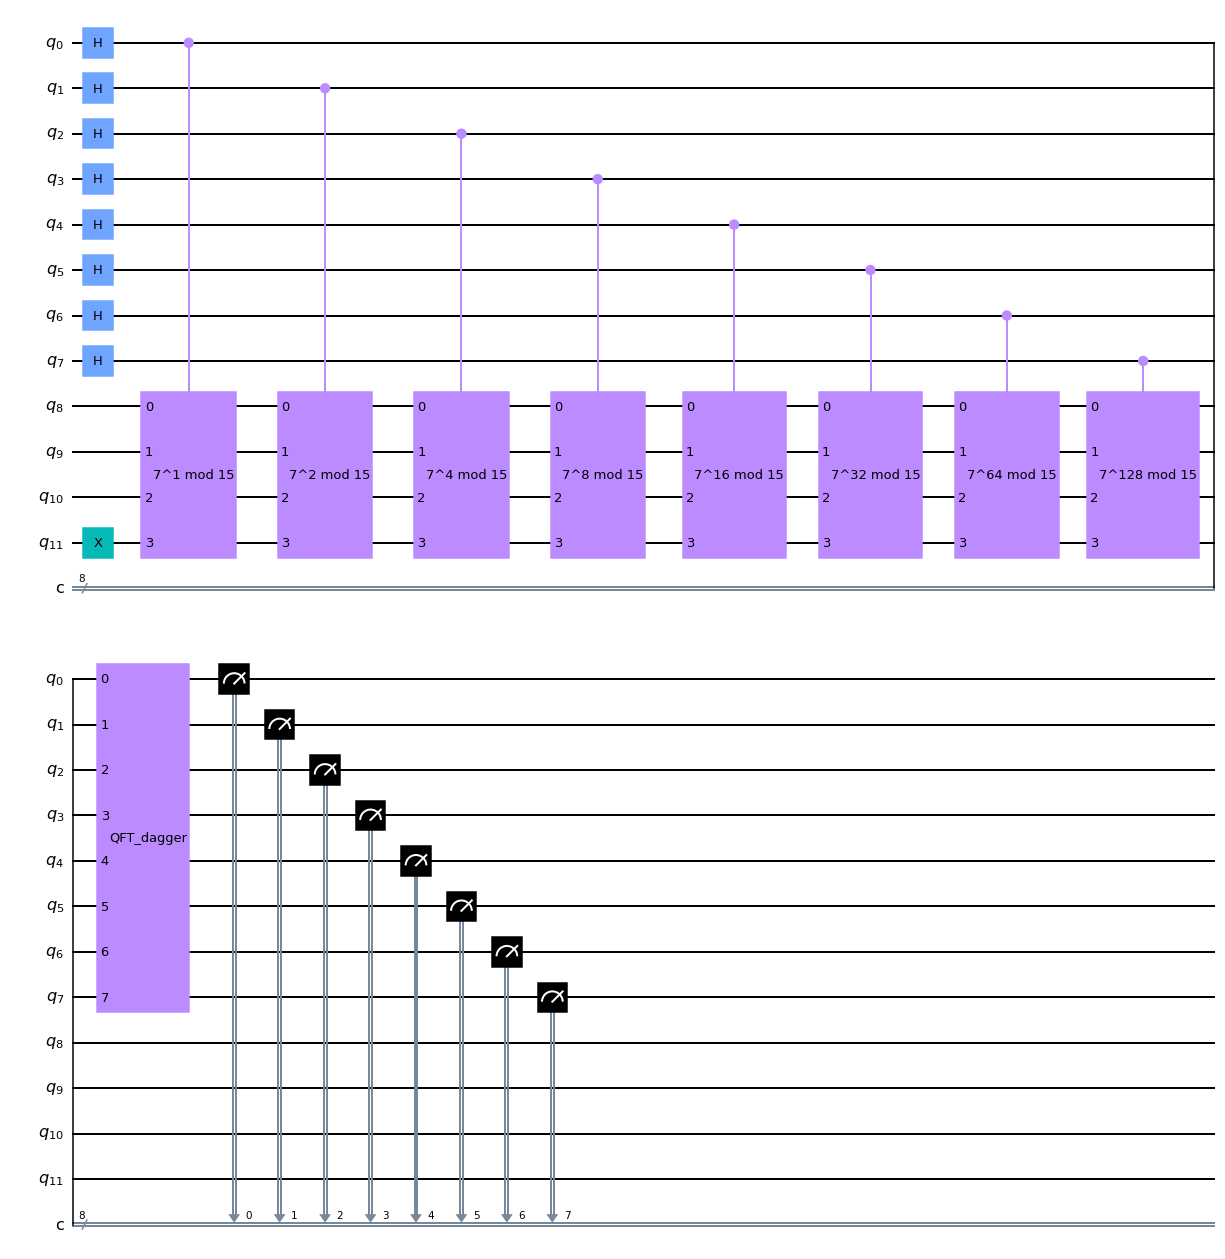

In [23]:
n_count=8
a=7
qc = QuantumCircuit(n_count + 4, n_count)
for q in range(n_count):
    qc.h(q)
qc.x(3+n_count)
for q in range(n_count):
    qc.append(mod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])
qc.append(qft_dagger(n_count), range(n_count))
qc.measure(range(n_count), range(n_count))
qc.draw()

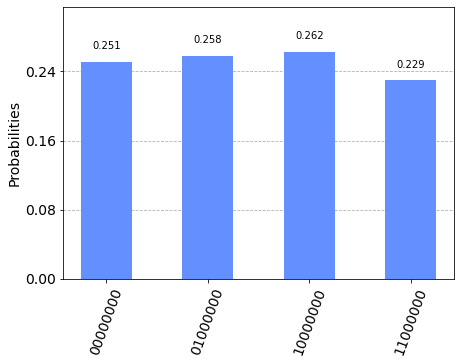

In [24]:
sim = Aer.get_backend('qasm_simulator')
trans_qc = transpile(qc, sim)
Qobj = assemble(trans_qc)
results = sim.run(Qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [45]:
from qiskit import IBMQ

def qpe_amod15(a):
    n_count = 8
    qc = QuantumCircuit(4+n_count, n_count)
    for q in range(n_count):
        qc.h(q)    
    qc.x(3+n_count)
    for q in range(n_count): 
        qc.append(mod15(a, 2**q), 
                 [q] + [i+n_count for i in range(4)])
    qc.append(qft_dagger(n_count), range(n_count)) 
    qc.measure(range(n_count), range(n_count))
    provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
    backend = provider.get_backend('ibmq_16_melbourne')
    t_qc = transpile(qc, backend)
    obj = assemble(t_qc, shots=1)
    result = qasm_sim.run(qobj, memory=True).result()
    readings = result.get_memory()
    print("Readings: " + readings[0])
    phase = int(readings[0],2)/(2**n_count)
    print("Phase: ", phase)
    return phase

In [54]:
a = 2
N= 35
factor_found = False
attempt = 0
while not factor_found:
    attempt += 1
    print("Attempt: ", attempt)
    phase = qpe_amod15(a)
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    print("Result: r = ", r)
    if phase != 0:
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:
                print("factor is: ", guess)
                factor_found = True

Attempt:  1
Readings: 00000000
Phase:  0.0
Result: r =  1
Attempt:  2
Readings: 00000000
Phase:  0.0
Result: r =  1
Attempt:  3
Readings: 10000000
Phase:  0.5
Result: r =  2
Guessed Factors: 1 and 1
Attempt:  4
Readings: 10000000
Phase:  0.5
Result: r =  2
Guessed Factors: 1 and 1
Attempt:  5
Readings: 00000000
Phase:  0.0
Result: r =  1
Attempt:  6
Readings: 00000000
Phase:  0.0
Result: r =  1
Attempt:  7
Readings: 01000000
Phase:  0.25
Result: r =  4
Guessed Factors: 1 and 5
factor is:  5
